## Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. 

In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.  

Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [24]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sqlalchemy import create_engine

In [25]:
# Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [9]:
heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
heartdisease_df.shape

(303, 14)

### Prep Data

In [26]:
# The dataset needs some preprocessing. So, apply the following code before working with the dataset:

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [27]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [38]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### Model data - 2 clusters (without Standard Scaler)

In [7]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
y_pred = kmeans_cluster.predict(X)

26.9 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


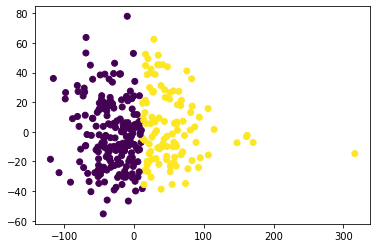

In [112]:
plt.scatter(pca[:,0], pca[:,1], c=y_pred)
plt.show()

These clusters are not isotropic.

### Model data - 2 clusters (with Standard Scaler)

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0       38  151
1      101   13


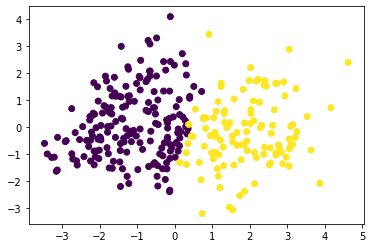

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

#### Model with multiple PCA iterations, I thought this might allow me to see a different clustering pattern showing clusters that are isotropic.

In [145]:
pca = PCA(n_components=4)

pca.fit_transform(X)

print(pca.explained_variance_ratio_)

[0.74647466 0.15006887 0.08510979 0.0161225 ]


In [150]:
pca = PCA(n_components=4).fit_transform(X)

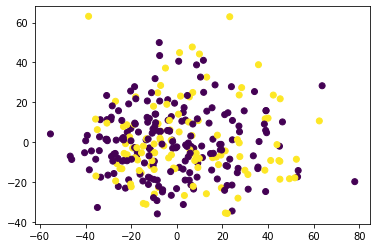

In [154]:
plt.scatter(pca[:,1], pca[:,2], c=y_pred)
plt.show()

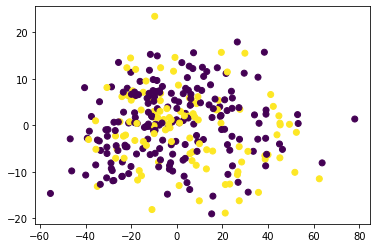

In [158]:
plt.scatter(pca[:,1], pca[:,3], c=y_pred)
plt.show()

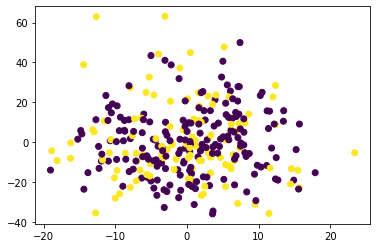

In [157]:
plt.scatter(pca[:,3], pca[:,2], c=y_pred)
plt.show()

Excluding the 1st PCA in any of the above simply produced noise, with no noticable clustering.

### 3 Clusters

In [27]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
y_pred = kmeans_cluster.predict(X)

25.4 ms ± 468 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
pca = PCA(n_components=2).fit_transform(X)

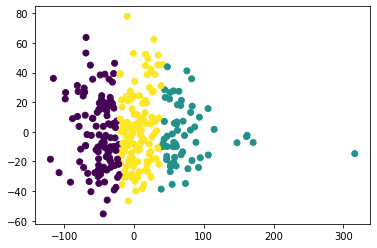

In [29]:
plt.scatter(pca[:,0], pca[:,1], c=y_pred)
plt.show()

### 4 Clusters

In [30]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
y_pred = kmeans_cluster.predict(X)

31.6 ms ± 253 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [99]:
pca = PCA(n_components=2).fit_transform(X)

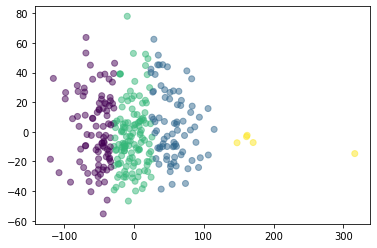

In [34]:
plt.scatter(pca[:,0], pca[:,1], c=y_pred, alpha=.5)
plt.show()

### 5 Clusters

In [126]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
y_pred = kmeans_cluster.predict(X)

37.5 ms ± 533 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [127]:
pca = PCA(n_components=2).fit_transform(X)

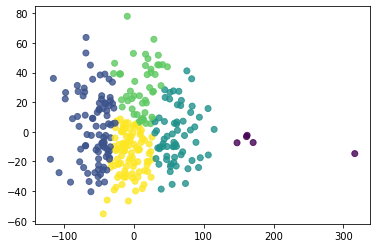

In [128]:
plt.scatter(pca[:,0], pca[:,1], c=y_pred, alpha=.8)
plt.show()

### 10 Clusters

In [129]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=10, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
y_pred = kmeans_cluster.predict(X)

53.7 ms ± 5.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
pca = PCA(n_components=2).fit_transform(X)

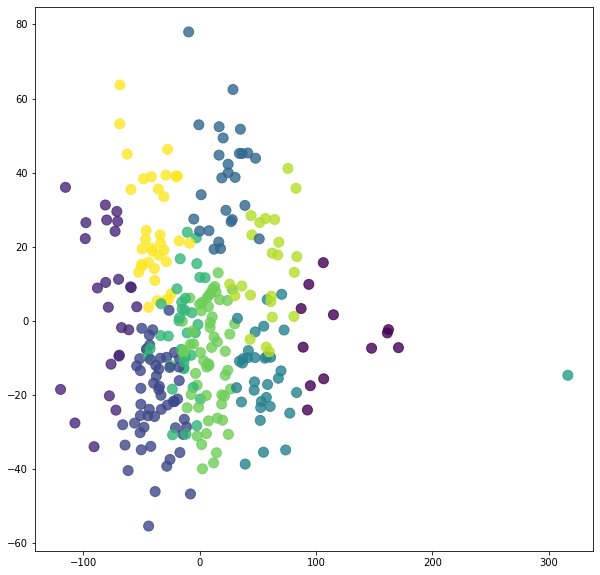

In [136]:
plt.figure(figsize=(10, 10))

plt.scatter(pca[:,0], pca[:,1], c=y_pred, alpha=.8, s=100)
plt.show()

With number of clusters set to 10, boundaries seem to be arbitrary.

### Try to segment two different pca values

In [28]:
pca = PCA(n_components=1)

pca_1 = pca.fit_transform(X.iloc[:,[7,8,9,10]])

print(pca.explained_variance_ratio_)

[0.99676077]


In [29]:
pca = PCA(n_components=1)

pca_2 = pca.fit_transform(X.iloc[:,[0,1,2,3,4,5,6,11]])

print(pca.explained_variance_ratio_)

[0.87488641]


(11.0, 0.0)

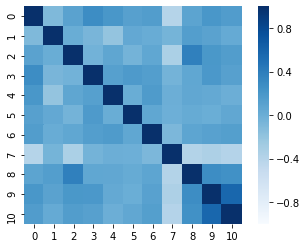

In [31]:
ax = sns.heatmap(X.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, 
                 annot=False, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [32]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
y_pred = kmeans_cluster.predict(X)

40.3 ms ± 971 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [105]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [107]:
y_pred

array([2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 0, 2, 3, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0,
       1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 3, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 3, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 3, 0, 1,
       2, 0, 1, 2, 2, 3, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2,
       0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,

Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.